# Energy Tests for Connector Components

This notebook tests the energy losses through various connector types in the ethanol production plant piping system.
All flow rates are in m³/s and mass flows are in kg/s.
**Using realistic industrial-scale flow rates (10-100 m³/h) for meaningful energy analysis.**

In [9]:
from systems.connectors import Pipe, Bend, Valve
import matplotlib.pyplot as plt
import numpy as np

## 1. Pipe Energy Loss Testing

Pipes lose energy due to friction. Energy loss increases with length, flow rate, and friction factor.
Using the Darcy-Weisbach equation for friction losses.

In [10]:
# Create a pipe with specific properties
pipe = Pipe(
    length=10.0,           # 10 meters long
    diameter=0.1,          # 0.1 meter (10 cm) diameter
    friction_factor=0.02   # Typical friction factor for commercial steel
)

# Test with realistic industrial flow rates
flow_rates_hourly = np.linspace(10.0, 100.0, 10)  # m³/h (industrial scale)
flow_rates = flow_rates_hourly / 3600  # Convert to m³/s
input_energy = 100000  # Joules (starting energy - increased for realistic scale)
input_mass_hourly = 50000  # kg/h (50 tons/hour - typical for ethanol plant)
input_mass = input_mass_hourly / 3600  # Convert to kg/s

output_energies = []
energy_losses = []

for flow in flow_rates:
    output_energy = pipe.pipeEnergyFunction(
        input_flow=flow,
        input_mass=input_mass,
        input_energy=input_energy
    )
    output_energies.append(output_energy)
    energy_losses.append(input_energy - output_energy)

print("Pipe Energy Loss Analysis:")
print(f"Pipe length: {pipe.length} m")
print(f"Pipe diameter: {pipe.diameter} m")
print(f"Friction factor: {pipe.friction_factor}")
print(f"\nFlow rate range: {flow_rates[0]:.6f} - {flow_rates[-1]:.6f} m³/s ({flow_rates_hourly[0]:.2f} - {flow_rates_hourly[-1]:.2f} m³/h)")
print(f"Mass flow rate: {input_mass:.6f} kg/s ({input_mass_hourly:.2f} kg/h)")
print(f"Energy loss range: {energy_losses[0]:.2f} - {energy_losses[-1]:.2f} J")
print(f"Power loss range: {energy_losses[0]:.2f} - {energy_losses[-1]:.2f} W")
print(f"Max energy loss: {max(energy_losses):.2f} J ({max(energy_losses)/input_energy*100:.2f}% of input)")

Pipe Energy Loss Analysis:
Pipe length: 10.0 m
Pipe diameter: 0.1 m
Friction factor: 0.02

Flow rate range: 0.002778 - 0.027778 m³/s (10.00 - 100.00 m³/h)
Mass flow rate: 13.888889 kg/s (50000.00 kg/h)
Energy loss range: 1.74 - 173.73 J
Power loss range: 1.74 - 173.73 W
Max energy loss: 173.73 J (0.17% of input)


## 2. Bend Energy Loss Testing

Bends cause energy losses due to flow direction changes and turbulence.
Loss depends on bend radius and bend factor (efficiency).

In [11]:
# Create a bend with specific properties
bend = Bend(
    bend_radius=0.5,    # 0.5 meter radius
    diameter=0.1,       # 0.1 meter diameter
    bend_factor=0.9     # 90% efficient (10% loss)
)

# Test with same flow rates
bend_output_energies = []
bend_energy_losses = []

for flow in flow_rates:
    output_energy = bend.bendEnergyFunction(
        input_flow=flow,
        input_mass=input_mass,
        input_energy=input_energy
    )
    bend_output_energies.append(output_energy)
    bend_energy_losses.append(input_energy - output_energy)

print("Bend Energy Loss Analysis:")
print(f"Bend radius: {bend.bend_radius} m")
print(f"Bend diameter: {bend.diameter} m")
print(f"Bend factor: {bend.bend_factor}")
print(f"\nFlow rate range: {flow_rates[0]:.6f} - {flow_rates[-1]:.6f} m³/s ({flow_rates_hourly[0]:.2f} - {flow_rates_hourly[-1]:.2f} m³/h)")
print(f"Energy loss range: {bend_energy_losses[0]:.2f} - {bend_energy_losses[-1]:.2f} J")
print(f"Power loss range: {bend_energy_losses[0]:.2f} - {bend_energy_losses[-1]:.2f} W")
print(f"Max energy loss: {max(bend_energy_losses):.2f} J ({max(bend_energy_losses)/input_energy*100:.2f}% of input)")

Bend Energy Loss Analysis:
Bend radius: 0.5 m
Bend diameter: 0.1 m
Bend factor: 0.9

Flow rate range: 0.002778 - 0.027778 m³/s (10.00 - 100.00 m³/h)
Energy loss range: 0.09 - 8.69 J
Power loss range: 0.09 - 8.69 W
Max energy loss: 8.69 J (0.01% of input)


## 3. Valve Energy Loss Testing

Valves provide controllable resistance to flow. Energy loss is proportional to the resistance coefficient and velocity squared.

In [12]:
# Create a valve with specific properties
valve = Valve(
    resistance_coefficient=1.0,  # Standard resistance
    diameter=0.1                 # 0.1 meter diameter
)

# Test with same flow rates
valve_output_energies = []
valve_energy_losses = []

for flow in flow_rates:
    output_energy = valve.valveEnergyFunction(
        input_flow=flow,
        input_mass=input_mass,
        input_energy=input_energy
    )
    valve_output_energies.append(output_energy)
    valve_energy_losses.append(input_energy - output_energy)

print("Valve Energy Loss Analysis:")
print(f"Resistance coefficient: {valve.resistance_coefficient}")
print(f"Valve diameter: {valve.diameter} m")
print(f"\nFlow rate range: {flow_rates[0]:.6f} - {flow_rates[-1]:.6f} m³/s ({flow_rates_hourly[0]:.2f} - {flow_rates_hourly[-1]:.2f} m³/h)")
print(f"Energy loss range: {valve_energy_losses[0]:.2f} - {valve_energy_losses[-1]:.2f} J")
print(f"Power loss range: {valve_energy_losses[0]:.2f} - {valve_energy_losses[-1]:.2f} W")
print(f"Max energy loss: {max(valve_energy_losses):.2f} J ({max(valve_energy_losses)/input_energy*100:.2f}% of input)")

Valve Energy Loss Analysis:
Resistance coefficient: 1.0
Valve diameter: 0.1 m

Flow rate range: 0.002778 - 0.027778 m³/s (10.00 - 100.00 m³/h)
Energy loss range: 0.87 - 86.87 J
Power loss range: 0.87 - 86.87 W
Max energy loss: 86.87 J (0.09% of input)


## 4. Comparative Energy Loss Visualization

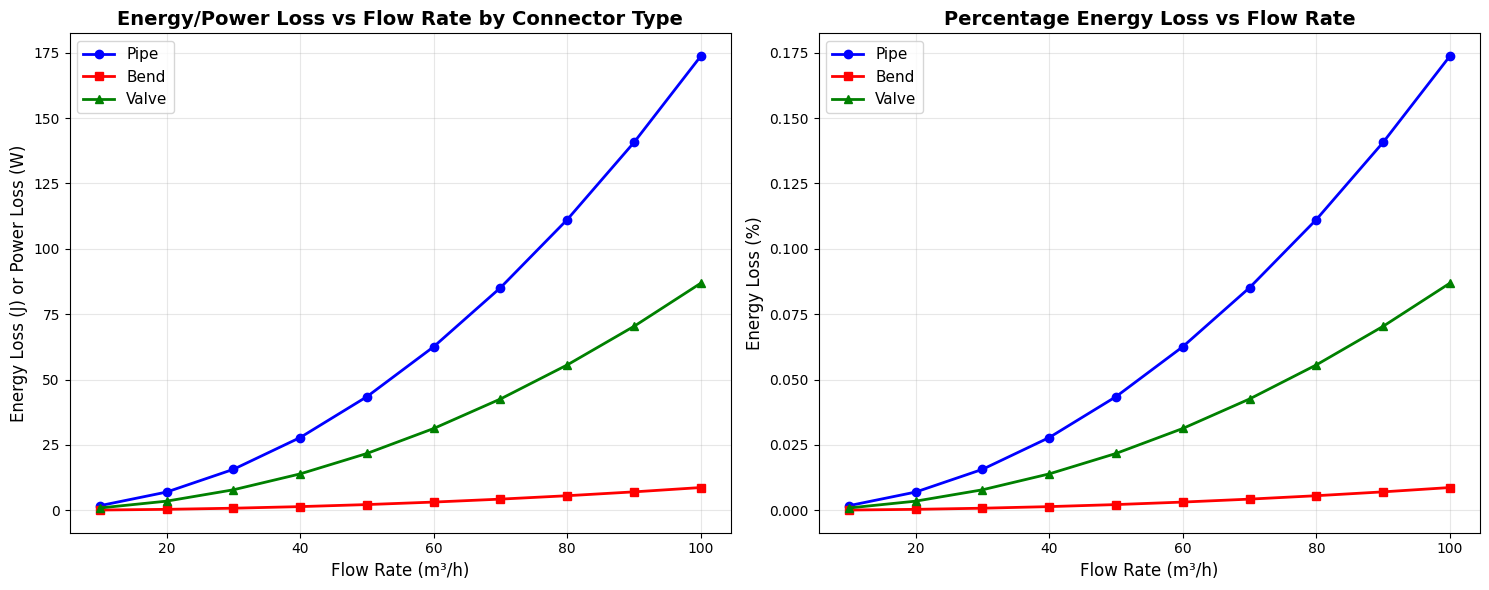


At maximum flow rate (100.00 m³/h = 0.027778 m³/s):
  Pipe loss: 0.17% (173.73 W)
  Bend loss: 0.01% (8.69 W)
  Valve loss: 0.09% (86.87 W)


In [13]:
# Plot energy losses for all connector types
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Energy loss vs flow rate (display in m³/h for readability)
ax1.plot(flow_rates_hourly, energy_losses, 'b-o', label='Pipe', linewidth=2, markersize=6)
ax1.plot(flow_rates_hourly, bend_energy_losses, 'r-s', label='Bend', linewidth=2, markersize=6)
ax1.plot(flow_rates_hourly, valve_energy_losses, 'g-^', label='Valve', linewidth=2, markersize=6)
ax1.set_xlabel('Flow Rate (m³/h)', fontsize=12)
ax1.set_ylabel('Energy Loss (J) or Power Loss (W)', fontsize=12)
ax1.set_title('Energy/Power Loss vs Flow Rate by Connector Type', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Percentage of energy lost
pipe_loss_pct = [loss/input_energy*100 for loss in energy_losses]
bend_loss_pct = [loss/input_energy*100 for loss in bend_energy_losses]
valve_loss_pct = [loss/input_energy*100 for loss in valve_energy_losses]

ax2.plot(flow_rates_hourly, pipe_loss_pct, 'b-o', label='Pipe', linewidth=2, markersize=6)
ax2.plot(flow_rates_hourly, bend_loss_pct, 'r-s', label='Bend', linewidth=2, markersize=6)
ax2.plot(flow_rates_hourly, valve_loss_pct, 'g-^', label='Valve', linewidth=2, markersize=6)
ax2.set_xlabel('Flow Rate (m³/h)', fontsize=12)
ax2.set_ylabel('Energy Loss (%)', fontsize=12)
ax2.set_title('Percentage Energy Loss vs Flow Rate', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nAt maximum flow rate ({flow_rates_hourly[-1]:.2f} m³/h = {flow_rates[-1]:.6f} m³/s):")
print(f"  Pipe loss: {pipe_loss_pct[-1]:.2f}% ({energy_losses[-1]:.2f} W)")
print(f"  Bend loss: {bend_loss_pct[-1]:.2f}% ({bend_energy_losses[-1]:.2f} W)")
print(f"  Valve loss: {valve_loss_pct[-1]:.2f}% ({valve_energy_losses[-1]:.2f} W)")

## 5. Series Connection Analysis

Test energy losses when connectors are connected in series (realistic piping scenario).

SERIES CONNECTION ANALYSIS
Initial conditions:
  Flow rate: 0.013889 m³/s (50.00 m³/h)
  Mass flow: 13.888889 kg/s (50000.00 kg/h)
  Initial energy: 100000 J

Piping system: Pipe (5m) -> Bend -> Valve -> Pipe (5m)

Energy losses by component:
  Pipe 1 (5m): 21.72 J (0.02%) = 21.72 W
  Bend:        2.17 J (0.00%) = 2.17 W
  Valve:       21.72 J (0.02%) = 21.72 W
  Pipe 2 (5m): 21.72 J (0.02%) = 21.72 W

  Total loss:  67.32 J (0.07%) = 67.32 W
  Final energy: 99932.68 J

Annual energy cost at $0.10/kWh: $58.97


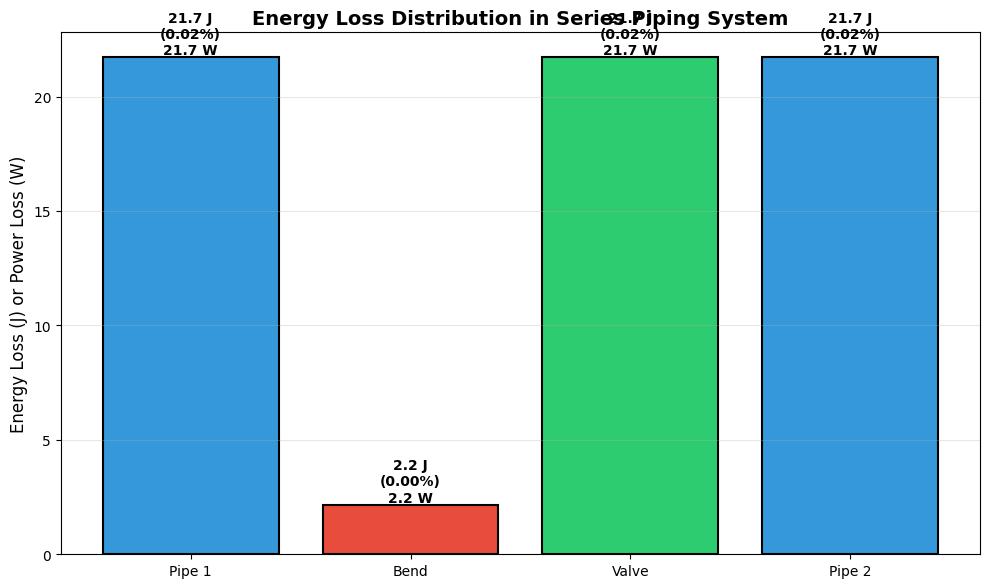

In [14]:
# Simulate a piping system: Pipe -> Bend -> Valve -> Pipe
test_flow_hourly = 50.0  # m³/h (mid-range industrial flow)
test_flow = test_flow_hourly / 3600  # m³/s
test_mass_hourly = 50000  # kg/h (50 tons/hour)
test_mass = test_mass_hourly / 3600  # kg/s
initial_energy = 100000  # J (increased for realistic scale)

print("=" * 60)
print("SERIES CONNECTION ANALYSIS")
print("=" * 60)
print(f"Initial conditions:")
print(f"  Flow rate: {test_flow:.6f} m³/s ({test_flow_hourly:.2f} m³/h)")
print(f"  Mass flow: {test_mass:.6f} kg/s ({test_mass_hourly:.2f} kg/h)")
print(f"  Initial energy: {initial_energy} J")
print(f"\nPiping system: Pipe (5m) -> Bend -> Valve -> Pipe (5m)")

# Component 1: Pipe (5m)
pipe1 = Pipe(length=5.0, diameter=0.1, friction_factor=0.02)
energy_after_pipe1 = pipe1.pipeEnergyFunction(
    input_flow=test_flow,
    input_mass=test_mass,
    input_energy=initial_energy
)
loss_pipe1 = initial_energy - energy_after_pipe1

# Component 2: Bend
energy_after_bend = bend.bendEnergyFunction(
    input_flow=test_flow,
    input_mass=test_mass,
    input_energy=energy_after_pipe1
)
loss_bend = energy_after_pipe1 - energy_after_bend

# Component 3: Valve
energy_after_valve = valve.valveEnergyFunction(
    input_flow=test_flow,
    input_mass=test_mass,
    input_energy=energy_after_bend
)
loss_valve = energy_after_bend - energy_after_valve

# Component 4: Pipe (5m)
pipe2 = Pipe(length=5.0, diameter=0.1, friction_factor=0.02)
final_energy = pipe2.pipeEnergyFunction(
    input_flow=test_flow,
    input_mass=test_mass,
    input_energy=energy_after_valve
)
loss_pipe2 = energy_after_valve - final_energy

total_loss = initial_energy - final_energy

print(f"\nEnergy losses by component:")
print(f"  Pipe 1 (5m): {loss_pipe1:.2f} J ({loss_pipe1/initial_energy*100:.2f}%) = {loss_pipe1:.2f} W")
print(f"  Bend:        {loss_bend:.2f} J ({loss_bend/initial_energy*100:.2f}%) = {loss_bend:.2f} W")
print(f"  Valve:       {loss_valve:.2f} J ({loss_valve/initial_energy*100:.2f}%) = {loss_valve:.2f} W")
print(f"  Pipe 2 (5m): {loss_pipe2:.2f} J ({loss_pipe2/initial_energy*100:.2f}%) = {loss_pipe2:.2f} W")
print(f"\n  Total loss:  {total_loss:.2f} J ({total_loss/initial_energy*100:.2f}%) = {total_loss:.2f} W")
print(f"  Final energy: {final_energy:.2f} J")
print(f"\nAnnual energy cost at $0.10/kWh: ${total_loss * 8760 / 1000 * 0.10:.2f}")

# Visualization of series losses
components = ['Pipe 1', 'Bend', 'Valve', 'Pipe 2']
losses = [loss_pipe1, loss_bend, loss_valve, loss_pipe2]

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#3498db']
bars = ax.bar(components, losses, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, loss in zip(bars, losses):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{loss:.1f} J\n({loss/initial_energy*100:.2f}%)\n{loss:.1f} W',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel('Energy Loss (J) or Power Loss (W)', fontsize=12)
ax.set_title('Energy Loss Distribution in Series Piping System', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Parameter Sensitivity Analysis

Analyze how different parameters affect energy losses.

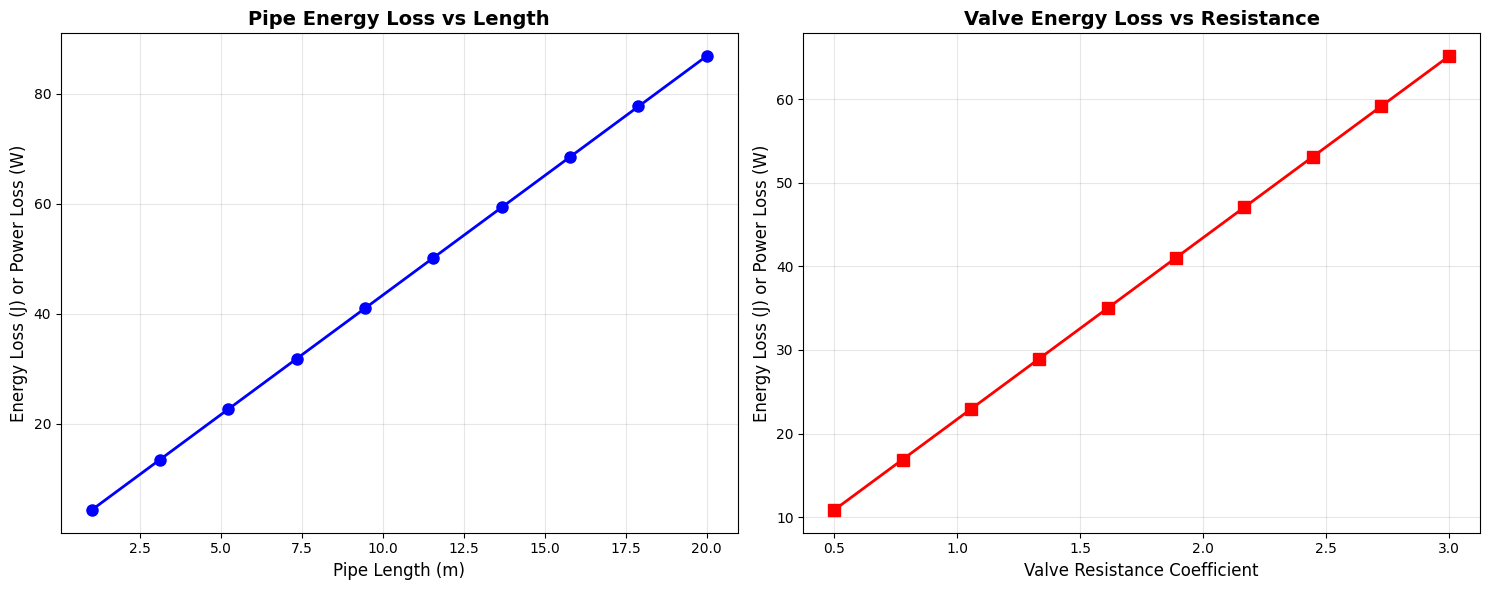

Sensitivity Analysis Results:
Test conditions: 0.013889 m³/s (50.00 m³/h), 13.888889 kg/s (50000.00 kg/h)

Pipe Length Effect:
  Length range: 1.0 - 20.0 m
  Loss increase: 82.52 J (82.52 W)
  Loss per meter: 4.34 J/m (4.34 W/m)

Valve Resistance Effect:
  Coefficient range: 0.5 - 3.0
  Loss increase: 54.29 J (54.29 W)
  Loss per unit resistance: 21.72 J


In [15]:
# Test effect of pipe length on energy loss
lengths = np.linspace(1, 20, 10)
test_flow_rate_hourly = 50.0  # m³/h (mid-range industrial)
test_flow_rate = test_flow_rate_hourly / 3600  # m³/s
length_losses = []

for length in lengths:
    test_pipe = Pipe(length=length, diameter=0.1, friction_factor=0.02)
    output = test_pipe.pipeEnergyFunction(
        input_flow=test_flow_rate,
        input_mass=input_mass,
        input_energy=input_energy
    )
    length_losses.append(input_energy - output)

# Test effect of valve resistance coefficient
resistance_coeffs = np.linspace(0.5, 3.0, 10)
resistance_losses = []

for coeff in resistance_coeffs:
    test_valve = Valve(resistance_coefficient=coeff, diameter=0.1)
    output = test_valve.valveEnergyFunction(
        input_flow=test_flow_rate,
        input_mass=input_mass,
        input_energy=input_energy
    )
    resistance_losses.append(input_energy - output)

# Plot sensitivity analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(lengths, length_losses, 'b-o', linewidth=2, markersize=8)
ax1.set_xlabel('Pipe Length (m)', fontsize=12)
ax1.set_ylabel('Energy Loss (J) or Power Loss (W)', fontsize=12)
ax1.set_title('Pipe Energy Loss vs Length', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(resistance_coeffs, resistance_losses, 'r-s', linewidth=2, markersize=8)
ax2.set_xlabel('Valve Resistance Coefficient', fontsize=12)
ax2.set_ylabel('Energy Loss (J) or Power Loss (W)', fontsize=12)
ax2.set_title('Valve Energy Loss vs Resistance', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Sensitivity Analysis Results:")
print(f"Test conditions: {test_flow_rate:.6f} m³/s ({test_flow_rate_hourly:.2f} m³/h), {input_mass:.6f} kg/s ({input_mass_hourly:.2f} kg/h)")
print(f"\nPipe Length Effect:")
print(f"  Length range: {lengths[0]:.1f} - {lengths[-1]:.1f} m")
print(f"  Loss increase: {length_losses[-1] - length_losses[0]:.2f} J ({length_losses[-1] - length_losses[0]:.2f} W)")
print(f"  Loss per meter: {(length_losses[-1] - length_losses[0])/(lengths[-1] - lengths[0]):.2f} J/m ({(length_losses[-1] - length_losses[0])/(lengths[-1] - lengths[0]):.2f} W/m)")

print(f"\nValve Resistance Effect:")
print(f"  Coefficient range: {resistance_coeffs[0]:.1f} - {resistance_coeffs[-1]:.1f}")
print(f"  Loss increase: {resistance_losses[-1] - resistance_losses[0]:.2f} J ({resistance_losses[-1] - resistance_losses[0]:.2f} W)")
print(f"  Loss per unit resistance: {(resistance_losses[-1] - resistance_losses[0])/(resistance_coeffs[-1] - resistance_coeffs[0]):.2f} J")

## 7. Mass Conservation Verification

Verify that all connectors conserve mass (no leaks).

In [16]:
# Test mass conservation through all connector types
test_mass_flow_hourly = 50000  # kg/h (50 tons/hour - realistic industrial scale)
test_mass_flow = test_mass_flow_hourly / 3600  # kg/s

mass_through_pipe = pipe.pipeMassFunction(input_mass=test_mass_flow)
mass_through_bend = bend.bendMassFunction(input_mass=test_mass_flow)
mass_through_valve = valve.valveMassFunction(input_mass=test_mass_flow)

print("=" * 60)
print("MASS CONSERVATION TEST")
print("=" * 60)
print(f"Input mass flow: {test_mass_flow:.6f} kg/s ({test_mass_flow_hourly:.2f} kg/h)\n")
print(f"Output mass flows:")
print(f"  Through pipe:  {mass_through_pipe:.6f} kg/s - {'✓ PASS' if abs(mass_through_pipe - test_mass_flow) < 1e-10 else '✗ FAIL'}")
print(f"  Through bend:  {mass_through_bend:.6f} kg/s - {'✓ PASS' if abs(mass_through_bend - test_mass_flow) < 1e-10 else '✗ FAIL'}")
print(f"  Through valve: {mass_through_valve:.6f} kg/s - {'✓ PASS' if abs(mass_through_valve - test_mass_flow) < 1e-10 else '✗ FAIL'}")
print(f"\n{'All connectors pass mass conservation test! ✓' if all([abs(mass_through_pipe - test_mass_flow) < 1e-10, abs(mass_through_bend - test_mass_flow) < 1e-10, abs(mass_through_valve - test_mass_flow) < 1e-10]) else 'Some connectors fail mass conservation! ✗'}")

MASS CONSERVATION TEST
Input mass flow: 13.888889 kg/s (50000.00 kg/h)

Output mass flows:
  Through pipe:  13.888889 kg/s - ✓ PASS
  Through bend:  13.888889 kg/s - ✓ PASS
  Through valve: 13.888889 kg/s - ✓ PASS

All connectors pass mass conservation test! ✓
